<a href="https://colab.research.google.com/github/HSYhrae/team3_semi_project/blob/data/Seoul_Jeonse_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 한글폰트 적용

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 12s (827 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120901 files and direc

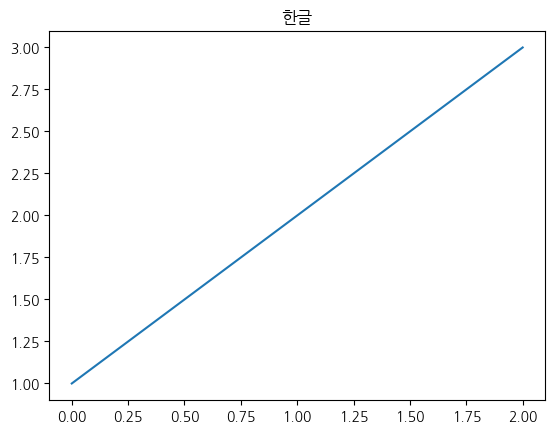

In [ ]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

## 구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## 데이터 불러오기 및 라이브러리 임포트


In [ ]:
'''
# 인코딩 확인 및 변환 시 참고 코드
# 데이터 전처리 코드에선 사용하지 않음 !!

import chardet # 인코딩 확인
import codecs  # 인코딩 변환

# 디렉토리 경로 설정
directory_path = '/content/drive/MyDrive/data/3team_project/전월세가'

# 2011년부터 2021년까지의 파일 불러오기 위한 반복문
for year in range(2011, 2022):
    # 파일명 생성
    file_name = f'/서울특별시_전월세가_{year}.txt'

    # 파일의 전체 경로 생성
    file_path = f'{directory_path}{file_name}'

    try:
        # 파일 인코딩 확인
        with open(file_path, 'rb') as file:
            detector = chardet.universaldetector.UniversalDetector()
            for line in file.readlines():
                detector.feed(line)
                if detector.done:
                    break
            detector.close()
            file_encoding = detector.result['encoding']

        # 인코딩 확인
        print(f'{year}년 데이터 파일의 인코딩: {file_encoding}')

        # 파일을 UTF-8로 변환하여 새 파일로 저장
        output_file_path = f'{directory_path}/서울특별시_전월세가_{year}_utf8.txt'
        with codecs.open(file_path, 'r', encoding=file_encoding) as file:
            content = file.read()
            with codecs.open(output_file_path, 'w', encoding='utf-8') as output_file:
                output_file.write(content)

        print(f'{year}년 데이터 파일을 UTF-8로 변환한 파일을 {output_file_path}에 저장했습니다.')
        print('\n')
    except FileNotFoundError:
        print(f'{year}년 데이터 파일이 존재하지 않습니다.')
'''

"\n# 인코딩 확인 및 변환 시 참고 코드\n# 데이터 전처리 코드에선 사용하지 않음 !!\n\nimport chardet # 인코딩 확인\nimport codecs  # 인코딩 변환\n\n# 디렉토리 경로 설정\ndirectory_path = '/content/drive/MyDrive/data/3team_project/전월세가'\n\n# 2011년부터 2021년까지의 파일 불러오기 위한 반복문\nfor year in range(2011, 2022):\n    # 파일명 생성\n    file_name = f'/서울특별시_전월세가_{year}.txt'\n\n    # 파일의 전체 경로 생성\n    file_path = f'{directory_path}{file_name}'\n\n    try:\n        # 파일 인코딩 확인\n        with open(file_path, 'rb') as file:\n            detector = chardet.universaldetector.UniversalDetector()\n            for line in file.readlines():\n                detector.feed(line)\n                if detector.done:\n                    break\n            detector.close()\n            file_encoding = detector.result['encoding']\n\n        # 인코딩 확인\n        print(f'{year}년 데이터 파일의 인코딩: {file_encoding}')\n\n        # 파일을 UTF-8로 변환하여 새 파일로 저장\n        output_file_path = f'{directory_path}/서울특별시_전월세가_{year}_utf8.txt'\n        with cod

In [ ]:
import os
import subprocess
import pandas as pd
import numpy as np

directory_path = '/content/drive/MyDrive/data/3team_project/전월세가'

# 빈 데이터프레임 생성
seoul_js_data = pd.DataFrame()

# 2011년부터 2021년까지의 파일 불러오기 위한 반복문
for year in range(2011, 2022):
  # 파일명 생성
  file_name = f'/서울특별시_전월세가_{year}.txt'

  # 파일의 전체 경로 생성
  file_path = f'{directory_path}{file_name}'

  try :
    # 파일 불러오기(텍스트 파일을 읽어오는 로직)
    with open(file_path, 'r', encoding='EUC-KR') as file:
      data = pd.read_csv(file, sep=',', engine='python')
      data['건물명'] = data['건물명'].str.strip() # 해당 컬럼에 있는 공백값 제거
      seoul_js_data = pd.concat([seoul_js_data, data], ignore_index=True)

      # 데이터 프레임을 사용하여 원하는 작업 수행
      # 데이터 프레임을 출력
      print(f'{year}년 데이터:')
      print(seoul_js_data.head())  # 데이터 프레임 출력
      print('\n')
  except FileNotFoundError:
    print(f'{year}년 데이터 파일이 존재하지 않습니다.') # 누락 데이터 확인

data2 = pd.read_csv('/content/drive/MyDrive/data/3team_project/전월세가/서울특별시_전월세가_2022.csv')
seoul_js_data = pd.concat([seoul_js_data, data2], ignore_index=True)

2011년 데이터:
   접수년도  자치구코드 자치구명    법정동코드   법정동명  지번구분코드 지번구분   본번   부번     층  ...  \
0  2011  11170  용산구  11300.0  원효로2가     1.0   대지  1.0  0.0   5.0  ...   
1  2011  11170  용산구  11300.0  원효로2가     1.0   대지  1.0  0.0   6.0  ...   
2  2011  11440  마포구  11000.0   노고산동     1.0   대지  1.0  1.0  10.0  ...   
3  2011  11440  마포구  11000.0   노고산동     1.0   대지  1.0  1.0   8.0  ...   
4  2011  11440  마포구  11000.0   노고산동     1.0   대지  1.0  1.0   5.0  ...   

   보증금(만원) 임대료(만원)    건물명    건축년도  건물용도 계약기간  신규계약구분 갱신청구권사용  종전보증금  종전임대료  
0     5000       0    (1)  1990.0  오피스텔  NaN     NaN     NaN    NaN    NaN  
1     5000       0    (1)  1990.0  오피스텔  NaN     NaN     NaN    NaN    NaN  
2     7000       0  (1-1)  1998.0  오피스텔  NaN     NaN     NaN    NaN    NaN  
3     3500      40  (1-1)  1998.0  오피스텔  NaN     NaN     NaN    NaN    NaN  
4     8000       0  (1-1)  1998.0  오피스텔  NaN     NaN     NaN    NaN    NaN  

[5 rows x 23 columns]


2012년 데이터:
   접수년도  자치구코드 자치구명    법정동코드   법정동명  지번구분코드 지번구분   본

In [ ]:
seoul_js_data

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
0,2011,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,5.0,...,5000,0,(1),1990.0,오피스텔,NaN,NaN,NaN,NaN,NaN
1,2011,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,6.0,...,5000,0,(1),1990.0,오피스텔,NaN,NaN,NaN,NaN,NaN
2,2011,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,10.0,...,7000,0,(1-1),1998.0,오피스텔,NaN,NaN,NaN,NaN,NaN
3,2011,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,8.0,...,3500,40,(1-1),1998.0,오피스텔,NaN,NaN,NaN,NaN,NaN
4,2011,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,5.0,...,8000,0,(1-1),1998.0,오피스텔,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071234,2023,11440,마포구,10300.0,신공덕동,1.0,대지,155.0,0.0,8.0,...,40000,70,신공덕1차삼성래미안1아파트,2000.0,아파트,23.02~25.02,신규,NaN,0.0,0.0
5071235,2023,11230,동대문구,10200.0,용두동,NaN,NaN,NaN,NaN,NaN,...,9450,0,NaN,1996.0,단독다가구,NaN,NaN,NaN,NaN,NaN
5071236,2023,11740,강동구,10200.0,고덕동,1.0,대지,277.0,5.0,2.0,...,25000,0,스타캐슬2,2021.0,연립다세대,NaN,신규,NaN,0.0,NaN
5071237,2023,11680,강남구,10500.0,삼성동,NaN,NaN,NaN,NaN,NaN,...,10000,95,NaN,1992.0,단독다가구,22.12~24.12,갱신,NaN,10000.0,63.0


- 2023년 전월세가 데이터 추가

In [ ]:
data_new = pd.read_csv('/content/drive/MyDrive/data/3team_project/전월세가/서울특별시_전월세가_2023.csv')
seoul_js_data_new = pd.concat([seoul_js_data, data_new], ignore_index=True)

In [ ]:
seoul_js_data_new

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,...,종전보증금,종전임대료,접수연도,지번구분명,전월세 구분,임대면적(㎡),신규갱신여부,계약갱신권사용여부,종전 보증금,종전 임대료
0,2011.0,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011.0,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011.0,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011.0,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011.0,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452627,NaN,11710,송파구,11100.0,방이동,1.0,NaN,28.0,2.0,5.0,...,NaN,NaN,2023.0,대지,월세,17.45,NaN,NaN,NaN,NaN
5452628,NaN,11260,중랑구,10100.0,면목동,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2023.0,NaN,전세,40.00,NaN,NaN,NaN,NaN
5452629,NaN,11710,송파구,10400.0,송파동,1.0,NaN,141.0,20.0,5.0,...,NaN,NaN,2023.0,대지,월세,26.84,신규,NaN,0.0,0.0
5452630,NaN,11590,동작구,10200.0,상도동,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2023.0,NaN,월세,10.00,NaN,NaN,NaN,NaN


In [ ]:
seoul_js_data_new.columns

Index(['접수년도', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분코드', '지번구분', '본번', '부번',
       '층', '계약일', '전월세구분', '임대면적', '보증금(만원)', '임대료(만원)', '건물명', '건축년도',
       '건물용도', '계약기간', '신규계약구분', '갱신청구권사용', '종전보증금', '종전임대료', '접수연도', '지번구분명',
       '전월세 구분', '임대면적(㎡)', '신규갱신여부', '계약갱신권사용여부', '종전 보증금', '종전 임대료'],
      dtype='object')

### 2023년 파일의 컬럼명이 기존 파일들의 컬럼명과 달라 병합에서 오류 발생


- 컬럼명 수정하기


In [ ]:
data_new.columns

Index(['접수연도', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분코드', '지번구분명', '본번', '부번',
       '층', '계약일', '전월세 구분', '임대면적(㎡)', '보증금(만원)', '임대료(만원)', '건물명', '건축년도',
       '건물용도', '계약기간', '신규갱신여부', '계약갱신권사용여부', '종전 보증금', '종전 임대료'],
      dtype='object')

In [ ]:
data_new_new_column_name = {
    '접수연도': '접수년도',
    '지번구분명': '지번구분',
    '전월세 구분': '전월세구분',
    '임대면적(㎡)': '임대면적',
    '신규갱신여부': '신규계약구분',
    '계약갱신권사용여부': '갱신청구권사용',
    '종전 보증금': '종전보증금',
    '종전 임대료': '종전임대료'}

data_new.rename(columns = data_new_new_column_name, inplace=True)
data_new.head(1)

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
0,2023,11290,성북구,13400,길음동,1.0,대지,1284.0,9.0,7.0,...,3074,25,"길음8단지(임대825동,1284-9))",2010.0,아파트,NaN,NaN,NaN,NaN,NaN


In [ ]:
seoul_js_data = pd.concat([seoul_js_data, data_new], ignore_index=True)
seoul_js_data

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
0,2011,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,5.0,...,5000,0,(1),1990.0,오피스텔,NaN,NaN,NaN,NaN,NaN
1,2011,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,6.0,...,5000,0,(1),1990.0,오피스텔,NaN,NaN,NaN,NaN,NaN
2,2011,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,10.0,...,7000,0,(1-1),1998.0,오피스텔,NaN,NaN,NaN,NaN,NaN
3,2011,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,8.0,...,3500,40,(1-1),1998.0,오피스텔,NaN,NaN,NaN,NaN,NaN
4,2011,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,5.0,...,8000,0,(1-1),1998.0,오피스텔,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452627,2023,11710,송파구,11100.0,방이동,1.0,대지,28.0,2.0,5.0,...,5000,57,엘루이시티,2019.0,오피스텔,NaN,NaN,NaN,NaN,NaN
5452628,2023,11260,중랑구,10100.0,면목동,NaN,NaN,NaN,NaN,NaN,...,6000,0,NaN,1992.0,단독다가구,NaN,NaN,NaN,NaN,NaN
5452629,2023,11710,송파구,10400.0,송파동,1.0,대지,141.0,20.0,5.0,...,2000,62,해피하우스,2014.0,연립다세대,23.01~25.01,신규,NaN,0.0,0.0
5452630,2023,11590,동작구,10200.0,상도동,NaN,NaN,NaN,NaN,NaN,...,1000,25,NaN,1990.0,단독다가구,NaN,NaN,NaN,NaN,NaN


In [ ]:
seoul_js_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5452632 entries, 0 to 5452631
Data columns (total 23 columns):
 #   Column   Dtype  
---  ------   -----  
 0   접수년도     int64  
 1   자치구코드    int64  
 2   자치구명     object 
 3   법정동코드    float64
 4   법정동명     object 
 5   지번구분코드   float64
 6   지번구분     object 
 7   본번       float64
 8   부번       float64
 9   층        float64
 10  계약일      int64  
 11  전월세구분    object 
 12  임대면적     float64
 13  보증금(만원)  int64  
 14  임대료(만원)  int64  
 15  건물명      object 
 16  건축년도     float64
 17  건물용도     object 
 18  계약기간     object 
 19  신규계약구분   object 
 20  갱신청구권사용  object 
 21  종전보증금    float64
 22  종전임대료    float64
dtypes: float64(9), int64(5), object(9)
memory usage: 956.8+ MB


In [ ]:
seoul_js_data.to_csv('/content/drive/MyDrive/data/3team_project/전월세가/서울특별시_전월세가_무편집통합본2.csv', encoding='utf-8', index=False)

In [ ]:
seoul_js_data

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
0,2011,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,5.0,...,5000,0,(1),1990.0,오피스텔,NaN,NaN,NaN,NaN,NaN
1,2011,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,6.0,...,5000,0,(1),1990.0,오피스텔,NaN,NaN,NaN,NaN,NaN
2,2011,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,10.0,...,7000,0,(1-1),1998.0,오피스텔,NaN,NaN,NaN,NaN,NaN
3,2011,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,8.0,...,3500,40,(1-1),1998.0,오피스텔,NaN,NaN,NaN,NaN,NaN
4,2011,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,5.0,...,8000,0,(1-1),1998.0,오피스텔,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452627,2023,11710,송파구,11100.0,방이동,1.0,대지,28.0,2.0,5.0,...,5000,57,엘루이시티,2019.0,오피스텔,NaN,NaN,NaN,NaN,NaN
5452628,2023,11260,중랑구,10100.0,면목동,NaN,NaN,NaN,NaN,NaN,...,6000,0,NaN,1992.0,단독다가구,NaN,NaN,NaN,NaN,NaN
5452629,2023,11710,송파구,10400.0,송파동,1.0,대지,141.0,20.0,5.0,...,2000,62,해피하우스,2014.0,연립다세대,23.01~25.01,신규,NaN,0.0,0.0
5452630,2023,11590,동작구,10200.0,상도동,NaN,NaN,NaN,NaN,NaN,...,1000,25,NaN,1990.0,단독다가구,NaN,NaN,NaN,NaN,NaN


### 무편집 전세 데이터 불러오기

In [ ]:
import pandas as pd
seoul_js_data = pd.read_csv('/content/drive/MyDrive/data/3team_project/전월세가/서울특별시_전월세가_무편집통합본2.csv', encoding='utf-8')

<ipython-input-13-fc31979b3790>:2: DtypeWarning: Columns (6,15,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  seoul_js_data = pd.read_csv('/content/drive/MyDrive/data/3team_project/전월세가/서울특별시_전월세가_무편집통합본2.csv', encoding='utf-8')


### 필요없는 컬럼 삭제

In [ ]:
# 삭제할 컬럼 범위 지정
columns_to_drop = ['계약기간', '신규계약구분', '갱신청구권사용', '종전보증금', '종전임대료']

# 컬럼 삭제
seoul_js_data = seoul_js_data.drop(columns=columns_to_drop)
seoul_js_data.head(1)

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),건물명,건축년도,건물용도
0,2011,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,5.0,20110401,전세,21.45,5000,0,(1),1990.0,오피스텔


In [ ]:
seoul_js_data.info()

### 필요없는 행 삭제

- 단독다가구는 본번, 부번이 없어 위도, 경도가 파악이 불가능하여 삭제

In [ ]:
# 전월세구분이 "단독다가구"가 아닌 행 데이터 갖고오기
seoul_js_data = seoul_js_data[seoul_js_data.건물용도 != '단독다가구']
# 전월세구분이 "월세"가 아닌 행 데이터 갖고오기
seoul_js_data = seoul_js_data[seoul_js_data.전월세구분 != '월세']

In [ ]:
# 인덱스 순번 초기화 (종전) rows 0 ~ 5071244 to (변동) 0 ~ 2439412
seoul_js_data = seoul_js_data.reset_index(drop=True)
seoul_js_data

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),건물명,건축년도,건물용도
0,2011,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,5.0,20110401,전세,21.45,5000,0,(1),1990.0,오피스텔
1,2011,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,6.0,20111008,전세,22.03,5000,0,(1),1990.0,오피스텔
2,2011,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,10.0,20110211,전세,31.12,7000,0,(1-1),1998.0,오피스텔
3,2011,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,5.0,20111126,전세,31.12,8000,0,(1-1),1998.0,오피스텔
4,2011,11650,서초구,10100.0,방배동,1.0,대지,1031.0,3.0,3.0,20110729,전세,28.80,7500,0,(1031-3),1987.0,오피스텔
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2439412,2023,11350,노원구,10500.0,상계동,1.0,대지,624.0,0.0,6.0,20221108,전세,49.94,15280,0,"상계주공15(고층,공무원임대)",1988.0,아파트
2439413,2023,11710,송파구,10200.0,신천동,1.0,대지,17.0,0.0,20.0,20221107,전세,84.79,88000,0,파크리오,2008.0,아파트
2439414,2023,11710,송파구,11200.0,오금동,1.0,대지,165.0,0.0,4.0,20221106,전세,45.77,30000,0,상아2차아파트,1988.0,아파트
2439415,2023,11740,강동구,10300.0,상일동,1.0,대지,515.0,0.0,19.0,20221106,전세,84.85,65000,0,고덕숲아이파크,2018.0,아파트


In [ ]:
seoul_js_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439417 entries, 0 to 2439416
Data columns (total 18 columns):
 #   Column   Dtype  
---  ------   -----  
 0   접수년도     int64  
 1   자치구코드    int64  
 2   자치구명     object 
 3   법정동코드    float64
 4   법정동명     object 
 5   지번구분코드   float64
 6   지번구분     object 
 7   본번       float64
 8   부번       float64
 9   층        float64
 10  계약일      int64  
 11  전월세구분    object 
 12  임대면적     float64
 13  보증금(만원)  int64  
 14  임대료(만원)  int64  
 15  건물명      object 
 16  건축년도     float64
 17  건물용도     object 
dtypes: float64(7), int64(5), object(6)
memory usage: 335.0+ MB


### 건축년도 값 소수 데이터에서 정수 데이터로 변환 및 건축년도, 층 결측치는 소량이므로 제거

In [ ]:
seoul_js_data['건축년도'].isnull().sum()

6411

In [ ]:
seoul_js_data['층'].isnull().sum()

11697

In [ ]:
seoul_js_data.dropna(subset=['건축년도'], inplace = True)
seoul_js_data.dropna(subset=['층'], inplace = True)

In [ ]:
print(seoul_js_data['건축년도'].isnull().sum())
print(seoul_js_data['층'].isnull().sum())

0
0


In [ ]:
seoul_js_data['건축년도'] = seoul_js_data['건축년도'].astype(int)
seoul_js_data.head(3)

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),건물명,건축년도,건물용도
0,2011,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,5.0,20110401,전세,21.45,5000,0,(1),1990,오피스텔
1,2011,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,6.0,20111008,전세,22.03,5000,0,(1),1990,오피스텔
2,2011,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,10.0,20110211,전세,31.12,7000,0,(1-1),1998,오피스텔


In [ ]:
# 인덱스 순번 초기화 (종전) rows 0 ~ 5071244 to (변동) 0 ~ 2439412
seoul_js_data = seoul_js_data.reset_index(drop=True)
seoul_js_data

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),건물명,건축년도,건물용도
0,2011,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,5.0,20110401,전세,21.45,5000,0,(1),1990,오피스텔
1,2011,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,6.0,20111008,전세,22.03,5000,0,(1),1990,오피스텔
2,2011,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,10.0,20110211,전세,31.12,7000,0,(1-1),1998,오피스텔
3,2011,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,5.0,20111126,전세,31.12,8000,0,(1-1),1998,오피스텔
4,2011,11650,서초구,10100.0,방배동,1.0,대지,1031.0,3.0,3.0,20110729,전세,28.80,7500,0,(1031-3),1987,오피스텔
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421309,2023,11350,노원구,10500.0,상계동,1.0,대지,624.0,0.0,6.0,20221108,전세,49.94,15280,0,"상계주공15(고층,공무원임대)",1988,아파트
2421310,2023,11710,송파구,10200.0,신천동,1.0,대지,17.0,0.0,20.0,20221107,전세,84.79,88000,0,파크리오,2008,아파트
2421311,2023,11710,송파구,11200.0,오금동,1.0,대지,165.0,0.0,4.0,20221106,전세,45.77,30000,0,상아2차아파트,1988,아파트
2421312,2023,11740,강동구,10300.0,상일동,1.0,대지,515.0,0.0,19.0,20221106,전세,84.85,65000,0,고덕숲아이파크,2018,아파트


### 계약일 기준으로 계약년도, 계약월 컬럼 생성

In [ ]:
# "계약일" 컬럼을 날짜 형식으로 변환
seoul_js_data['계약일'] = pd.to_datetime(seoul_js_data['계약일'], format='%Y%m%d')

# "계약년도"와 "계약월" 컬럼 추가
seoul_js_data['계약년도'] = seoul_js_data['계약일'].dt.year
seoul_js_data['계약월'] = seoul_js_data['계약일'].dt.month

In [ ]:
seoul_js_data.head(3)
# 맨 우측에 계약년도, 계약월 컬럼 생성된 것 확인

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약년도,계약월
0,2011,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,5.0,2011-04-01,전세,21.45,5000,0,(1),1990.0,오피스텔,2011,4
1,2011,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,6.0,2011-10-08,전세,22.03,5000,0,(1),1990.0,오피스텔,2011,10
2,2011,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,10.0,2011-02-11,전세,31.12,7000,0,(1-1),1998.0,오피스텔,2011,2


### '계약년도 - 건축년도'로 건물연수 컬럼 생성

In [ ]:
seoul_js_data['건물연수'] = seoul_js_data['계약년도'] - seoul_js_data['건축년도']
seoul_js_data.head(1)

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,...,전월세구분,임대면적,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약년도,계약월,건물연수
0,2011,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,5.0,...,전세,21.45,5000,0,(1),1990.0,오피스텔,2011,4,21.0


### 컬럼 슬라이싱 하기
- 컬럼 순번 양식화

In [ ]:
seoul_js_data.columns

Index(['접수년도', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분코드', '지번구분', '본번', '부번',
       '층', '계약일', '전월세구분', '임대면적', '보증금(만원)', '임대료(만원)', '건물명', '건축년도',
       '건물용도', '계약년도', '계약월', '건물연수'],
      dtype='object')

In [ ]:
column_select = ['계약년도', '계약월', '계약일', '자치구코드', '자치구명',  '법정동코드', '법정동명', '지번구분코드', '지번구분', '본번', '부번', '층', '건물연수', '건물용도', '보증금(만원)', '임대면적'] # 컬럼 슬라이싱 목록
seoul_js_data = seoul_js_data.loc[:, column_select]
seoul_js_data.head(3)

,계약년도,계약월,계약일,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,건물연수,건물용도,보증금(만원),임대면적
0,2011,4,2011-04-01,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,5.0,21.0,오피스텔,5000,21.45
1,2011,10,2011-10-08,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,6.0,21.0,오피스텔,5000,22.03
2,2011,2,2011-02-11,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,10.0,13.0,오피스텔,7000,31.12


In [ ]:
seoul_js_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421101 entries, 0 to 5452631
Data columns (total 16 columns):
 #   Column   Dtype         
---  ------   -----         
 0   계약년도     int64         
 1   계약월      int64         
 2   계약일      datetime64[ns]
 3   자치구코드    int64         
 4   자치구명     object        
 5   법정동코드    float64       
 6   법정동명     object        
 7   지번구분코드   float64       
 8   지번구분     object        
 9   본번       float64       
 10  부번       float64       
 11  층        float64       
 12  건물연수     float64       
 13  건물용도     object        
 14  보증금(만원)  int64         
 15  임대면적     float64       
dtypes: datetime64[ns](1), float64(7), int64(4), object(4)
memory usage: 314.0+ MB


In [ ]:
missing_values = seoul_js_data.isnull().sum()
print(missing_values)

계약년도       0
계약월        0
계약일        0
자치구코드      0
자치구명       0
법정동코드      0
법정동명       0
지번구분코드     0
지번구분       0
본번         0
부번         0
층          0
건물연수       0
건물용도       0
보증금(만원)    0
임대면적       0
dtype: int64


### 임대면적 0.00 인 데이터 제거 및 부번, 법정동명 결측치 제거

In [ ]:
seoul_js_data = seoul_js_data[seoul_js_data['임대면적'] != 0.00]

In [ ]:
seoul_js_data.dropna(subset=['부번'], inplace=True)
seoul_js_data.dropna(subset=['법정동명'], inplace=True)

In [ ]:
# 결측치 제거됨이 확인됨
missing_values = seoul_js_data.isnull().sum()
print(missing_values)

접수년도        0
자치구코드       0
자치구명        0
법정동코드       0
법정동명        0
지번구분코드      0
지번구분        0
본번          0
부번          0
층           0
계약일         0
전월세구분       0
임대면적        0
보증금(만원)     0
임대료(만원)     0
건물명        86
건축년도        0
건물용도        0
dtype: int64


In [ ]:
seoul_js_data = seoul_js_data.reset_index(drop=True)
seoul_js_data

,계약년도,계약월,계약일,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,건물연수,건물용도,보증금(만원),임대면적
0,2011,4,2011-04-01,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,5.0,21.0,오피스텔,5000,21.45
1,2011,10,2011-10-08,11170,용산구,11300.0,원효로2가,1.0,대지,1.0,0.0,6.0,21.0,오피스텔,5000,22.03
2,2011,2,2011-02-11,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,10.0,13.0,오피스텔,7000,31.12
3,2011,11,2011-11-26,11440,마포구,11000.0,노고산동,1.0,대지,1.0,1.0,5.0,13.0,오피스텔,8000,31.12
4,2011,7,2011-07-29,11650,서초구,10100.0,방배동,1.0,대지,1031.0,3.0,3.0,24.0,오피스텔,7500,28.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421096,2022,11,2022-11-08,11350,노원구,10500.0,상계동,1.0,대지,624.0,0.0,6.0,34.0,아파트,15280,49.94
2421097,2022,11,2022-11-07,11710,송파구,10200.0,신천동,1.0,대지,17.0,0.0,20.0,14.0,아파트,88000,84.79
2421098,2022,11,2022-11-06,11710,송파구,11200.0,오금동,1.0,대지,165.0,0.0,4.0,34.0,아파트,30000,45.77
2421099,2022,11,2022-11-06,11740,강동구,10300.0,상일동,1.0,대지,515.0,0.0,19.0,4.0,아파트,65000,84.85


## 병합할 데이터 불러오기

In [ ]:
IR_UR_df = pd.read_csv('/content/drive/MyDrive/data/3team_project/최종X 데이터/lr_uer_merged(월별).csv', encoding='EUC-KR') # encoding = EUC-KR
EI_df = pd.read_csv('/content/drive/MyDrive/data/3team_project/최종X 데이터/경기종합지리_전처리완료(월별).csv') # encoding = utf-8
NSDT_df = pd.read_csv('/content/drive/MyDrive/data/3team_project/최종X 데이터/전국주택_전세수급동향_총집계본(월별).csv') # National Supply and Demand Trends 수급동향  # encoding = utf-8
population_df = pd.read_csv('/content/drive/MyDrive/data/3team_project/최종X 데이터/서울_연령별_인구수_전처리(연도별).csv') # encoding = utf-8
HR_df = pd.read_csv('/content/drive/MyDrive/data/3team_project/최종X 데이터/서울주택재개발_전처리완료(연도별).csv') # encoding = utf-8
HSPI_df = pd.read_csv('/content/drive/MyDrive/data/3team_project/최종X 데이터/한국부동산원_공동주택 실거래가격지수_공동주택 통합_월별 지역별 매매_20230531.csv', encoding='euc-kr')
Crime_df = pd.read_csv('/content/drive/MyDrive/팀 프로젝트 /서울시5대범죄전처리완료.csv', encoding = 'utf-8')

### 기준금리 및 실업률 전처리

In [ ]:
IR_UR_df.head(1)

,년,월,금리,실업률
0,2011,1,2.75,3.8


In [ ]:
# 두개의 데이터 프레임 합치기 위한 Rename
IR_UR_df_new_column_name = {
    '년' : 'Year',
    '월' : 'Month',
    '금리' : 'IR', # Interest Rate
    '실업률' : 'UR', # unemployment Rate
}

IR_UR_df.rename(columns=IR_UR_df_new_column_name, inplace=True)

In [ ]:
IR_UR_df.head(1)

,Year,Month,IR,UR
0,2011,1,2.75,3.8


### 경기종합지수 전처리

In [ ]:
EI_df.head(1)

,년,월,선행종합지수(2020=100),동행종합지수(2020=100),후행종합지수(2020=100)
0,2011,1,72.0,78.2,74.2


In [ ]:
# 두개의 데이터 프레임 합치기 위한 Rename
EI_df_new_column_name = {
    '년' : 'Year',
    '월' : 'Month',
    '선행종합지수(2020=100)' : 'LC_index', # Leading Composite index
    '동행종합지수(2020=100)' : 'CA_index', # Comprehensive Accompany index
    '후행종합지수(2020=100)' : 'TC_index' # Trailing Composite index
}

EI_df.rename(columns=EI_df_new_column_name, inplace=True)

In [ ]:
EI_df.head(1)

,Year,Month,LC_index,CA_index,TC_index
0,2011,1,72.0,78.2,74.2


### 전세수급동향 전처리

In [ ]:
NSDT_df.head(1)

,년,월,지역,지수
0,2012,7,전국,102.191207


#### 결측치 파악 및 삭제처리 후 재확인

In [ ]:
missing_values = NSDT_df.isnull().sum()
print(missing_values)

년     0
월     0
지역    0
지수    5
dtype: int64


In [ ]:
missing_rows = NSDT_df[NSDT_df.isnull().any(axis=1)]
missing_rows

,년,월,지역,지수
32,2012,7,세종,NaN
73,2012,8,세종,NaN
114,2012,9,세종,NaN
155,2012,10,세종,NaN
196,2012,11,세종,NaN


In [ ]:
NSDT_df = NSDT_df.dropna()

In [ ]:
missing_values = NSDT_df.isnull().sum()
print(missing_values)

년     0
월     0
지역    0
지수    0
dtype: int64


In [ ]:
NSDT_df['지역'].value_counts()

전국            133
경기 경의권        133
인천            133
부산            133
부산 중부산권       133
부산 동부산권       133
부산 서부산권       133
대구            133
광주            133
대전            133
울산            133
강원            133
충북            133
충남            133
전북            133
전남            133
경북            133
경남            133
제주            133
경기 경원권        133
경기 동부2권       133
수도권           133
경기 동부1권       133
지방권           133
6대광역시         133
5대광역시         133
9개도           133
8개도           133
서울            133
서울 강북지역       133
서울 강북지역도심권    133
서울 강북지역동북권    133
서울 강북지역서북권    133
서울 강남지역       133
서울 강남지역서남권    133
서울 강남지역동남권    133
경기            133
경기 경부1권       133
경기 경부2권       133
경기 서해안권       133
세종            128
Name: 지역, dtype: int64

#### 전세수급동향 데이터 '서울'에 해당하는 데이터 외 전부 삭제처리

In [ ]:
NSDT_df = NSDT_df[NSDT_df['지역'] == '서울'].reset_index(drop=True)

In [ ]:
NSDT_df.head(1)

,년,월,지역,지수
0,2012,7,서울,102.461258


In [ ]:
# 지역 컬럼 데이터 삭제
NSDT_df = NSDT_df.drop(['지역'], axis = 1)

In [ ]:
# 두개의 데이터 프레임 합치기 위한 Rename
NSDT_df_new_column_name = {
    '년' : 'Year',
    '월' : 'Month',
    '지수' : 'SDT_index', # Supply and demand trend index
}

NSDT_df.rename(columns=NSDT_df_new_column_name, inplace=True)

In [ ]:
NSDT_df.head(1)

,Year,Month,SDT_index
0,2012,7,102.461258


### 인구수 전처리

In [ ]:
population_df

,시점,행정구역(시군구)별,계,0 - 19세,20 - 34세,35 - 54세,55 -
0,2000,서울특별시,10287787,2749537.0,3071339.0,3097026.0,1369884.0
1,2000,종로구,186484,44708.0,54219.0,54308.0,33248.0
2,2000,중구,133632,30770.0,40371.0,38671.0,23819.0
3,2000,용산구,238788,55423.0,72768.0,68443.0,42153.0
4,2000,성동구,339982,87422.0,107141.0,97142.0,48277.0
...,...,...,...,...,...,...,...
619,2023,관악구,487192,NaN,NaN,NaN,NaN
620,2023,서초구,404484,NaN,NaN,NaN,NaN
621,2023,강남구,537139,NaN,NaN,NaN,NaN
622,2023,송파구,657101,NaN,NaN,NaN,NaN


In [ ]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시점          624 non-null    int64  
 1   행정구역(시군구)별  624 non-null    object 
 2   계           624 non-null    int64  
 3   0 - 19세     598 non-null    float64
 4   20 - 34세    598 non-null    float64
 5   35 - 54세    598 non-null    float64
 6   55 -        598 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 34.2+ KB


#### 인구수 2011이후이면서 합계만 추출(행정구역에서는 '서울특별시'제외)

In [ ]:
condition = (population_df['시점'] >= 2011) & (population_df['행정구역(시군구)별'] != '서울특별시')
population_df = population_df[condition]
population_df = population_df.loc[:, ['시점', '행정구역(시군구)별', '계']].reset_index(drop = True)
population_df

,시점,행정구역(시군구)별,계
0,2011,종로구,163975
1,2011,중구,128861
2,2011,용산구,236688
3,2011,성동구,299533
4,2011,광진구,368260
...,...,...,...
320,2023,관악구,487192
321,2023,서초구,404484
322,2023,강남구,537139
323,2023,송파구,657101


In [ ]:
population_df_new_column_name = {
    '시점': 'Year',
    '행정구역(시군구)별': 'Region_Name',
    '계': 'Population'
}

population_df.rename(columns = population_df_new_column_name, inplace=True)

In [ ]:
population_df.head(1)

,Year,Region_Name,Population
0,2011,종로구,163975


In [ ]:
HR_df

,년,자치구별,건립가구 (가구)_완료,시행완료 재개발수 구분
0,2011,종로구,0,적거나 없음
1,2011,중구,1840,매우 많음
2,2011,용산구,1062,많음
3,2011,성동구,551,보통
4,2011,광진구,0,적거나 없음
...,...,...,...,...
270,2021,관악구,0,적거나 없음
271,2021,서초구,0,적거나 없음
272,2021,강남구,0,적거나 없음
273,2021,송파구,0,적거나 없음


In [ ]:
HR_df = HR_df.drop('시행완료 재개발수 구분', axis = 1)
HR_df_new_column_name = {
    '년': 'Year',
    '자치구별': 'Region_Name',
    '건립가구 (가구)_완료': 'Num_hb' # Number of households built
}

HR_df.rename(columns = HR_df_new_column_name, inplace=True)

In [ ]:
HR_df.head(1)

,Year,Region_Name,Num_hb
0,2011,종로구,0


### 공동주택 통합 매매 실거래가격지수 전처리

In [ ]:
HSPI_df.head(1)

,날짜,실거래가격지수
0,Jan-11,81.2


In [ ]:
from datetime import datetime

HSPI_df['날짜'] = HSPI_df['날짜'].apply(lambda x: datetime.strptime(x, '%b-%y').strftime('%Y-%m'))

In [ ]:
HSPI_df

,날짜,실거래가격지수
0,2011-01,81.2
1,2011-02,82.0
2,2011-03,81.7
3,2011-04,81.2
4,2011-05,80.6
...,...,...
144,2023-01,143.3
145,2023-02,146.2
146,2023-03,148.3
147,2023-04,150.7


In [ ]:
HSPI_df['년'] = HSPI_df['날짜'].apply(lambda x: x.split('-')[0])
HSPI_df['월'] = HSPI_df['날짜'].apply(lambda x: x.split('-')[1])

In [ ]:
HSPI_df.head(1)

,날짜,실거래가격지수,년,월
0,2011-01,81.2,2011,01


In [ ]:
HSPI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       149 non-null    object 
 1   실거래가격지수  149 non-null    float64
 2   년        149 non-null    object 
 3   월        149 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.8+ KB


In [ ]:
HSPI_df['년'] = HSPI_df['년'].astype(int)
HSPI_df['월'] = HSPI_df['월'].astype(int)

In [ ]:
HSPI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       149 non-null    object 
 1   실거래가격지수  149 non-null    float64
 2   년        149 non-null    int64  
 3   월        149 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.8+ KB


In [ ]:
column_select = ['년', '월', '실거래가격지수'] # 컬럼 슬라이싱 목록
HSPI_df = HSPI_df.loc[:, column_select]
HSPI_df.head(3)

,년,월,실거래가격지수
0,2011,1,81.2
1,2011,2,82.0
2,2011,3,81.7


In [ ]:
HSPI_df_new_column_name = {
    '년': 'Year',
    '월': 'Month',
    '실거래가격지수': 'HSP_index' # 주택 매매 실거래가격지수
}

HSPI_df.rename(columns = HSPI_df_new_column_name, inplace=True)
HSPI_df.head(3)

,Year,Month,HSP_index
0,2011,1,81.2
1,2011,2,82.0
2,2011,3,81.7


In [ ]:
# 아래 컬럼들 정수로 변환
seoul_js_data['법정동코드'] = seoul_js_data['법정동코드'].astype(int)
seoul_js_data['본번'] = seoul_js_data['본번'].astype(int)
seoul_js_data['부번'] = seoul_js_data['부번'].astype(int)
seoul_js_data['지번구분코드'] = seoul_js_data['지번구분코드'].astype(int)

In [ ]:
# 아래 컬럼들 문자열로 변환
seoul_js_data['법정동코드'] = seoul_js_data['법정동코드'].astype(str)
seoul_js_data['본번'] = seoul_js_data['본번'].astype(str)
seoul_js_data['부번'] = seoul_js_data['부번'].astype(str)
seoul_js_data['지번구분코드'] = seoul_js_data['지번구분코드'].astype(str)

In [ ]:
# 부번이 0 이면 부번을 제외하고 주소를 정의하기
def get_address(row):
    if row["부번"] == '0':
        return row["자치구명"] + " " + row["법정동명"] + " " + row["본번"]
    else:
        return row["자치구명"] + " " + row["법정동명"] + " " + row["본번"] + "-" + row["부번"]

seoul_js_data["address"] = seoul_js_data.apply(get_address, axis=1)

### 서울 범죄 데이터 전처리

In [ ]:
Crime_df.head(1)

,Unnamed: 0,년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간·강제추행발생,강간·강제추행검거,절도발생,절도검거,폭력발생,폭력검거,발생합계,인구수,범죄율,범죄율등수
0,0,2014,종로구,3,7,12,15,226,948,2272,1281,2508,2359,5021,165344,3.036699,2


In [ ]:
column_select = ['년도', '자치구별', '범죄율'] # 컬럼 슬라이싱 목록
Crime_df = Crime_df.loc[:, column_select]
Crime_df

,년도,자치구별,범죄율
0,2014,종로구,3.036699
1,2014,중구,3.839914
2,2014,용산구,1.520123
3,2014,성동구,1.178712
4,2014,광진구,1.660947
...,...,...,...
195,2021,관악구,0.889781
196,2021,서초구,0.878493
197,2021,강남구,1.142804
198,2021,송파구,0.709977


In [ ]:
Crime_df = Crime_df.rename(columns = {
    '년도': 'Year',
    '자치구별': 'Region_Name',
    '범죄율': 'Crime_Rates'
})
Crime_df.head(1)

,Year,Region_Name,Crime_Rates
0,2014,종로구,3.036699


### 병합하기

- 전세 데이터 컬럼 영어로 변경하기

In [ ]:
seoul_js_data.columns.nunique()

17

In [ ]:
seoul_js_data.columns

Index(['계약년도', '계약월', '계약일', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분코드',
       '지번구분', '본번', '부번', '층', '건물연수', '건물용도', '보증금(만원)', '임대면적', 'address'],
      dtype='object')

In [ ]:
seoul_js_data_new_columns_names = {
    '계약년도': 'Year',
    '계약월': 'Month',
    '계약일': 'Date',
    '자치구명': 'Region_Name',
    '자치구코드': 'Region_Code',
    '법정동코드': 'KA_Code',
    '법정동명': 'KA_Name',
    '지번구분코드': 'LNA_Code',
    '지번구분': 'LNA_Name',
    '본번': 'Main_num',
    '부번': 'Sub_num',
    '층': 'Floor',
    '건물연수': 'Building_Age',
    '건물용도': 'Building_Use',
    '보증금(만원)': 'JS_Price',
    '임대면적': 'JS_BA',
}
seoul_js_data.rename(columns = seoul_js_data_new_columns_names, inplace=True)
seoul_js_data.head(1)

,Year,Month,Date,Region_Code,Region_Name,KA_Code,KA_Name,LNA_Code,LNA_Name,Main_num,Sub_num,Floor,Building_Age,Building_Use,JS_Price,JS_BA,address
0,2011,4,2011-04-01,11170,용산구,11300,원효로2가,1,대지,1,0,5.0,21,오피스텔,5000,21.45,용산구 원효로2가 1


In [ ]:
merged_df = pd.merge(seoul_js_data, population_df, on = ['Year', 'Region_Name'], how='left')
merged_df = pd.merge(merged_df, IR_UR_df, on=['Year', 'Month'], how='left')
merged_df = pd.merge(merged_df, EI_df, on=['Year', 'Month'], how='left')
merged_df = pd.merge(merged_df, NSDT_df, on=['Year', 'Month'], how='left')
merged_df = pd.merge(merged_df, HSPI_df, on=['Year', 'Month'], how='left')
merged_df = pd.merge(merged_df, Crime_df, on=['Year', 'Region_Name'], how='left')
merged_df.head(1)

,Year,Month,Date,Region_Code,Region_Name,KA_Code,KA_Name,LNA_Code,LNA_Name,Main_num,...,address,Population,IR,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Crime_Rates
0,2011,4,2011-04-01,11170,용산구,11300,원효로2가,1,대지,1,...,용산구 원효로2가 1,236688,3.0,3.7,72.5,78.4,75.3,NaN,81.2,NaN


In [ ]:
merged_df

,Year,Month,Date,Region_Code,Region_Name,KA_Code,KA_Name,LNA_Code,LNA_Name,Main_num,...,address,Population,IR,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Crime_Rates
0,2011,4,2011-04-01,11170,용산구,11300,원효로2가,1,대지,1,...,용산구 원효로2가 1,236688,3.00,3.7,72.5,78.4,75.3,NaN,81.2,NaN
1,2011,10,2011-10-08,11170,용산구,11300,원효로2가,1,대지,1,...,용산구 원효로2가 1,236688,3.25,2.9,72.9,80.0,77.1,NaN,79.4,NaN
2,2011,2,2011-02-11,11440,마포구,11000,노고산동,1,대지,1,...,마포구 노고산동 1-1,384129,2.75,4.5,72.3,78.2,74.5,NaN,82.0,NaN
3,2011,11,2011-11-26,11440,마포구,11000,노고산동,1,대지,1,...,마포구 노고산동 1-1,384129,3.25,2.9,72.9,79.9,77.3,NaN,78.6,NaN
4,2011,7,2011-07-29,11650,서초구,10100,방배동,1,대지,1031,...,서초구 방배동 1031-3,427110,3.25,3.3,72.7,79.5,76.5,NaN,80.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421096,2022,11,2022-11-08,11350,노원구,10500,상계동,1,대지,624,...,노원구 상계동 624,504265,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN
2421097,2022,11,2022-11-07,11710,송파구,10200,신천동,1,대지,17,...,송파구 신천동 17,652993,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN
2421098,2022,11,2022-11-06,11710,송파구,11200,오금동,1,대지,165,...,송파구 오금동 165,652993,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN
2421099,2022,11,2022-11-06,11740,강동구,10300,상일동,1,대지,515,...,강동구 상일동 515,457679,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN


In [ ]:
merged_df.to_csv('/content/drive/MyDrive/data/3team_project/전월세가/서울시_전세_건별통합본(23년, 건물연수 추가).csv', encoding='utf-8', index=False)

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/data/3team_project/전월세가/서울시_전세_건별통합본(23년, 건물연수 추가).csv')

SyntaxError: ignored

In [ ]:
test_df

In [ ]:
test_df.isnull().sum()

## 위도, 경도 컬럼 추가

In [ ]:
import pandas as pd

In [ ]:
jeonse_df = pd.read_csv('/content/drive/MyDrive/data/3team_project/전월세가/서울시_전세_건별통합본(23년, 건물연수 추가).csv')
jeonse_df.tail(5)

,Year,Month,Date,Region_Code,Region_Name,KA_Code,KA_Name,LNA_Code,LNA_Name,Main_num,...,address,Population,IR,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Crime_Rates
2421096,2022,11,2022-11-08,11350,노원구,10500,상계동,1,대지,624,...,노원구 상계동 624,504265,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN
2421097,2022,11,2022-11-07,11710,송파구,10200,신천동,1,대지,17,...,송파구 신천동 17,652993,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN
2421098,2022,11,2022-11-06,11710,송파구,11200,오금동,1,대지,165,...,송파구 오금동 165,652993,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN
2421099,2022,11,2022-11-06,11740,강동구,10300,상일동,1,대지,515,...,강동구 상일동 515,457679,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN
2421100,2022,11,2022-11-05,11350,노원구,10300,공릉동,1,대지,714,...,노원구 공릉동 714,504265,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN


In [ ]:
jeonse_df.groupby(['Building_Use'])['Building_Use'].count()

Building_Use
아파트      1504622
연립다세대     720324
오피스텔      196155
Name: Building_Use, dtype: int64

In [ ]:
jeonse_df['위도'] = 37
jeonse_df['경도'] = 126
jeonse_df

,Year,Month,Date,Region_Code,Region_Name,KA_Code,KA_Name,LNA_Code,LNA_Name,Main_num,...,IR,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Crime_Rates,위도,경도
0,2011,4,2011-04-01,11170,용산구,11300,원효로2가,1,대지,1,...,3.00,3.7,72.5,78.4,75.3,NaN,81.2,NaN,37,126
1,2011,10,2011-10-08,11170,용산구,11300,원효로2가,1,대지,1,...,3.25,2.9,72.9,80.0,77.1,NaN,79.4,NaN,37,126
2,2011,2,2011-02-11,11440,마포구,11000,노고산동,1,대지,1,...,2.75,4.5,72.3,78.2,74.5,NaN,82.0,NaN,37,126
3,2011,11,2011-11-26,11440,마포구,11000,노고산동,1,대지,1,...,3.25,2.9,72.9,79.9,77.3,NaN,78.6,NaN,37,126
4,2011,7,2011-07-29,11650,서초구,10100,방배동,1,대지,1031,...,3.25,3.3,72.7,79.5,76.5,NaN,80.1,NaN,37,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421096,2022,11,2022-11-08,11350,노원구,10500,상계동,1,대지,624,...,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37,126
2421097,2022,11,2022-11-07,11710,송파구,10200,신천동,1,대지,17,...,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37,126
2421098,2022,11,2022-11-06,11710,송파구,11200,오금동,1,대지,165,...,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37,126
2421099,2022,11,2022-11-06,11740,강동구,10300,상일동,1,대지,515,...,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37,126


In [ ]:
jeonse_df['address'].nunique()

In [ ]:
unique_rows = jeonse_df.drop_duplicates(subset='address', keep='first')
unique_rows = unique_rows.reset_index(drop=True)
unique_loc_up = unique_rows.head(46989)
unique_loc_down = unique_rows.tail(50000)

In [ ]:
unique_loc_up

In [ ]:
unique_loc_down

In [ ]:
unique_loc_up.to_csv('/content/drive/MyDrive/data/3team_project/전월세가/서울특별시_전월세가_윗부분.csv', encoding='utf-8', index=False)
unique_loc_down.to_csv('/content/drive/MyDrive/data/3team_project/전월세가/서울특별시_전월세가_아랫부분.csv', encoding='utf-8', index=False)

- 별도 파일에서 Google map API 활용 위도, 경도를 산출함

In [ ]:
unique_loc_up = pd.read_csv('/content/drive/MyDrive/data/3team_project/전월세가/서울특별시_전월세가_윗부분(완성)_utf8.csv', encoding = 'utf-8')
unique_loc_down = pd.read_csv('/content/drive/MyDrive/data/3team_project/전월세가/서울특별시_전월세가_아랫부분(완성)_utf8.csv', encoding = 'utf-8')

In [ ]:
unique_loc_up

,Year,Month,Region_Code,Region_Name,KA_Code,KA_Name,LNA_Code,LNA_Name,Main_num,Sub_num,...,Population,IR,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,위도,경도
0,2011,4,11170,용산구,11300,원효로2가,1,대지,1,0,...,236688,3.00,3.7,72.5,78.4,75.3,NaN,81.2,37.537739,126.965287
1,2011,2,11440,마포구,11000,노고산동,1,대지,1,1,...,384129,2.75,4.5,72.3,78.2,74.5,NaN,82.0,37.556254,126.942750
2,2011,7,11650,서초구,10100,방배동,1,대지,1031,3,...,427110,3.25,3.3,72.7,79.5,76.5,NaN,80.1,37.478172,126.999450
3,2011,1,11620,관악구,10300,남현동,1,대지,1061,18,...,521193,2.75,3.8,72.0,78.2,74.2,NaN,81.2,37.474500,126.981390
4,2011,2,11440,마포구,11000,노고산동,1,대지,109,100,...,384129,2.75,4.5,72.3,78.2,74.5,NaN,82.0,37.552989,126.935067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46984,2012,8,11170,용산구,13000,이태원동,1,대지,206,15,...,235931,3.00,3.0,74.5,81.1,78.6,101.686418,73.6,37.539298,126.992953
46985,2012,2,11440,마포구,12000,서교동,1,대지,403,7,...,380669,3.25,4.2,73.6,80.4,77.8,NaN,77.7,37.549555,126.920425
46986,2012,8,11380,은평구,10400,갈현동,1,대지,448,35,...,489536,3.00,3.0,74.5,81.1,78.6,101.686418,73.6,37.620084,126.913733
46987,2012,6,11230,동대문구,10600,장안동,1,대지,410,13,...,357595,3.25,3.2,74.5,81.1,78.3,NaN,75.2,37.563718,127.060087


In [ ]:
unique_loc_down

,Year,Month,Region_Code,Region_Name,KA_Code,KA_Name,LNA_Code,LNA_Name,Main_num,Sub_num,...,Population,IR,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,위도,경도
0,2012,7,11710,송파구,10800,문정동,1,대지,112,11,...,669058.0,3.00,3.1,74.5,81.5,78.5,102.461258,74.2,37.485920,127.132775
1,2012,3,11200,성동구,11500,성수동2가,1,대지,320,6,...,295034.0,3.25,3.7,73.9,80.5,77.9,NaN,77.1,37.541618,127.055522
2,2012,2,11320,도봉구,10800,도봉동,1,대지,598,23,...,359554.0,3.25,4.2,73.6,80.4,77.8,NaN,77.7,37.677282,127.042543
3,2012,1,11500,강서구,10100,염창동,1,대지,278,8,...,561431.0,3.25,3.5,73.1,79.9,77.7,NaN,78.0,37.552732,126.870748
4,2012,1,11710,송파구,10800,문정동,1,대지,49,9,...,669058.0,3.25,3.5,73.1,79.9,77.7,NaN,78.0,37.487069,127.124090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2022,12,11215,광진구,10100,중곡동,1,대지,18,65,...,335712.0,3.25,3.0,109.5,108.4,112.4,NaN,141.8,37.566657,127.086870
49996,2022,12,11305,강북구,10100,미아동,1,대지,258,598,...,293601.0,3.25,3.0,109.5,108.4,112.4,NaN,141.8,37.627412,127.030717
49997,2022,12,11545,금천구,10300,시흥동,1,대지,953,7,...,228373.0,3.25,3.0,109.5,108.4,112.4,NaN,141.8,37.442290,126.905779
49998,2022,12,11440,마포구,12400,연남동,1,대지,364,19,...,362719.0,3.25,3.0,109.5,108.4,112.4,NaN,141.8,37.565525,126.917845


In [ ]:
unique_js_df = pd.concat([unique_loc_up, unique_loc_down], ignore_index=True)

In [ ]:
unique_js_df

,Year,Month,Region_Code,Region_Name,KA_Code,KA_Name,LNA_Code,LNA_Name,Main_num,Sub_num,...,Population,IR,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,위도,경도
0,2011,4,11170,용산구,11300,원효로2가,1,대지,1,0,...,236688.0,3.00,3.7,72.5,78.4,75.3,NaN,81.2,37.537739,126.965287
1,2011,2,11440,마포구,11000,노고산동,1,대지,1,1,...,384129.0,2.75,4.5,72.3,78.2,74.5,NaN,82.0,37.556254,126.942750
2,2011,7,11650,서초구,10100,방배동,1,대지,1031,3,...,427110.0,3.25,3.3,72.7,79.5,76.5,NaN,80.1,37.478172,126.999450
3,2011,1,11620,관악구,10300,남현동,1,대지,1061,18,...,521193.0,2.75,3.8,72.0,78.2,74.2,NaN,81.2,37.474500,126.981390
4,2011,2,11440,마포구,11000,노고산동,1,대지,109,100,...,384129.0,2.75,4.5,72.3,78.2,74.5,NaN,82.0,37.552989,126.935067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96984,2022,12,11215,광진구,10100,중곡동,1,대지,18,65,...,335712.0,3.25,3.0,109.5,108.4,112.4,NaN,141.8,37.566657,127.086870
96985,2022,12,11305,강북구,10100,미아동,1,대지,258,598,...,293601.0,3.25,3.0,109.5,108.4,112.4,NaN,141.8,37.627412,127.030717
96986,2022,12,11545,금천구,10300,시흥동,1,대지,953,7,...,228373.0,3.25,3.0,109.5,108.4,112.4,NaN,141.8,37.442290,126.905779
96987,2022,12,11440,마포구,12400,연남동,1,대지,364,19,...,362719.0,3.25,3.0,109.5,108.4,112.4,NaN,141.8,37.565525,126.917845


In [ ]:
unique_js_df = unique_js_df.loc[:, ['address', '위도', '경도']]

In [ ]:
jeonse_df_test = jeonse_df.copy()

In [ ]:
merged_df = pd.merge(jeonse_df_test, unique_js_df, on=['address'], how='left')
merged_df

,Year,Month,Date,Region_Code,Region_Name,KA_Code,KA_Name,LNA_Code,LNA_Name,Main_num,...,LC_index,CA_index,TC_index,SDT_index,HSP_index,Crime_Rates,위도_x,경도_x,위도_y,경도_y
0,2011,4,2011-04-01,11170,용산구,11300,원효로2가,1,대지,1,...,72.5,78.4,75.3,NaN,81.2,NaN,37,126,37.537739,126.965287
1,2011,10,2011-10-08,11170,용산구,11300,원효로2가,1,대지,1,...,72.9,80.0,77.1,NaN,79.4,NaN,37,126,37.537739,126.965287
2,2011,2,2011-02-11,11440,마포구,11000,노고산동,1,대지,1,...,72.3,78.2,74.5,NaN,82.0,NaN,37,126,37.556254,126.942750
3,2011,11,2011-11-26,11440,마포구,11000,노고산동,1,대지,1,...,72.9,79.9,77.3,NaN,78.6,NaN,37,126,37.556254,126.942750
4,2011,7,2011-07-29,11650,서초구,10100,방배동,1,대지,1031,...,72.7,79.5,76.5,NaN,80.1,NaN,37,126,37.478172,126.999450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421096,2022,11,2022-11-08,11350,노원구,10500,상계동,1,대지,624,...,109.7,108.9,111.8,72.039914,146.8,NaN,37,126,37.668783,127.053725
2421097,2022,11,2022-11-07,11710,송파구,10200,신천동,1,대지,17,...,109.7,108.9,111.8,72.039914,146.8,NaN,37,126,37.520536,127.106151
2421098,2022,11,2022-11-06,11710,송파구,11200,오금동,1,대지,165,...,109.7,108.9,111.8,72.039914,146.8,NaN,37,126,37.497938,127.136728
2421099,2022,11,2022-11-06,11740,강동구,10300,상일동,1,대지,515,...,109.7,108.9,111.8,72.039914,146.8,NaN,37,126,37.551493,127.161300


In [ ]:
merged_df.isnull().sum()

Year                 0
Month                0
Date                 0
Region_Code          0
Region_Name          0
KA_Code              0
KA_Name              0
LNA_Code             0
LNA_Name             0
Main_num             0
Sub_num              0
Floor                0
Building_Age         0
Building_Use         0
JS_Price             0
JS_BA                0
address              0
Population           0
IR               17737
UR               17737
LC_index         17737
CA_index         17737
TC_index         17737
SDT_index       283850
HSP_index        54041
Crime_Rates     904158
위도_x                 0
경도_x                 0
위도_y                 0
경도_y                 0
dtype: int64

In [ ]:
merged_df = merged_df.drop(['위도_x', '경도_x'], axis = 1)

In [ ]:
merged_df = merged_df.rename(columns = {'위도_y': '위도', '경도_y': '경도'})
merged_df

,Year,Month,Date,Region_Code,Region_Name,KA_Code,KA_Name,LNA_Code,LNA_Name,Main_num,...,IR,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Crime_Rates,위도,경도
0,2011,4,2011-04-01,11170,용산구,11300,원효로2가,1,대지,1,...,3.00,3.7,72.5,78.4,75.3,NaN,81.2,NaN,37.537739,126.965287
1,2011,10,2011-10-08,11170,용산구,11300,원효로2가,1,대지,1,...,3.25,2.9,72.9,80.0,77.1,NaN,79.4,NaN,37.537739,126.965287
2,2011,2,2011-02-11,11440,마포구,11000,노고산동,1,대지,1,...,2.75,4.5,72.3,78.2,74.5,NaN,82.0,NaN,37.556254,126.942750
3,2011,11,2011-11-26,11440,마포구,11000,노고산동,1,대지,1,...,3.25,2.9,72.9,79.9,77.3,NaN,78.6,NaN,37.556254,126.942750
4,2011,7,2011-07-29,11650,서초구,10100,방배동,1,대지,1031,...,3.25,3.3,72.7,79.5,76.5,NaN,80.1,NaN,37.478172,126.999450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421096,2022,11,2022-11-08,11350,노원구,10500,상계동,1,대지,624,...,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.668783,127.053725
2421097,2022,11,2022-11-07,11710,송파구,10200,신천동,1,대지,17,...,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.520536,127.106151
2421098,2022,11,2022-11-06,11710,송파구,11200,오금동,1,대지,165,...,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.497938,127.136728
2421099,2022,11,2022-11-06,11740,강동구,10300,상일동,1,대지,515,...,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.551493,127.161300


In [ ]:
merged_df.to_csv('/content/drive/MyDrive/data/3team_project/전월세가/서울시_전세_위도_경도_종합본.csv', encoding='utf-8', index=False)

## 전세가격 종합본에 평균 매매가격 컬럼 병합

In [ ]:
import pandas as pd
seoul_Sell_group = pd.read_csv('/content/drive/MyDrive/data/3team_project/서울시_매매가/서울시_매매_groupby버전.csv')
seoul_Jeonse_loc = pd.read_csv('/content/drive/MyDrive/data/3team_project/전월세가/서울시_전세_위도_경도_종합본.csv')

In [ ]:
seoul_Sell_group

,계약년도,계약월,주소,건물용도,물건금액(만원)
0,2006,1,양천구 신월동 42-13,연립다세대,7000.0
1,2006,10,용산구 한남동 807,아파트,86000.0
2,2007,1,서초구 서초동 1488-5,아파트,45000.0
3,2007,3,노원구 공릉동 230,아파트,29900.0
4,2007,8,강서구 화곡동 354-2,연립다세대,14000.0
...,...,...,...,...,...
814974,2023,9,중랑구 신내동 785,아파트,55000.0
814975,2023,9,중랑구 신내동 816,아파트,80000.0
814976,2023,9,중랑구 중화동 309-106,연립다세대,25250.0
814977,2023,9,중랑구 중화동 322-34,연립다세대,30600.0


### 전세 데이터 (위도, 경도 포함)

In [ ]:
seoul_Jeonse_loc

,Year,Month,Date,Region_Code,Region_Name,KA_Code,KA_Name,LNA_Code,LNA_Name,Main_num,...,IR,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Crime_Rates,위도,경도
0,2011,4,2011-04-01,11170,용산구,11300,원효로2가,1,대지,1,...,3.00,3.7,72.5,78.4,75.3,NaN,81.2,NaN,37.537739,126.965287
1,2011,10,2011-10-08,11170,용산구,11300,원효로2가,1,대지,1,...,3.25,2.9,72.9,80.0,77.1,NaN,79.4,NaN,37.537739,126.965287
2,2011,2,2011-02-11,11440,마포구,11000,노고산동,1,대지,1,...,2.75,4.5,72.3,78.2,74.5,NaN,82.0,NaN,37.556254,126.942750
3,2011,11,2011-11-26,11440,마포구,11000,노고산동,1,대지,1,...,3.25,2.9,72.9,79.9,77.3,NaN,78.6,NaN,37.556254,126.942750
4,2011,7,2011-07-29,11650,서초구,10100,방배동,1,대지,1031,...,3.25,3.3,72.7,79.5,76.5,NaN,80.1,NaN,37.478172,126.999450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421096,2022,11,2022-11-08,11350,노원구,10500,상계동,1,대지,624,...,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.668783,127.053725
2421097,2022,11,2022-11-07,11710,송파구,10200,신천동,1,대지,17,...,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.520536,127.106151
2421098,2022,11,2022-11-06,11710,송파구,11200,오금동,1,대지,165,...,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.497938,127.136728
2421099,2022,11,2022-11-06,11740,강동구,10300,상일동,1,대지,515,...,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.551493,127.161300


In [ ]:
seoul_Jeonse_loc.columns

Index(['Year', 'Month', 'Date', 'Region_Code', 'Region_Name', 'KA_Code',
       'KA_Name', 'LNA_Code', 'LNA_Name', 'Main_num', 'Sub_num', 'Floor',
       'Building_Age', 'Building_Use', 'JS_Price', 'JS_BA', 'address',
       'Population', 'IR', 'UR', 'LC_index', 'CA_index', 'TC_index',
       'SDT_index', 'HSP_index', 'Crime_Rates', '위도', '경도'],
      dtype='object')

In [ ]:
seoul_Sell = seoul_Sell_group.rename(columns={'계약년도': 'Year', '계약월': 'Month', '주소': 'address', '건물용도': 'Building_Use', '물건금액(만원)': 'Sell_Price_mean'})
seoul_Sell

,Year,Month,address,Building_Use,Sell_Price_mean
0,2006,1,양천구 신월동 42-13,연립다세대,7000.0
1,2006,10,용산구 한남동 807,아파트,86000.0
2,2007,1,서초구 서초동 1488-5,아파트,45000.0
3,2007,3,노원구 공릉동 230,아파트,29900.0
4,2007,8,강서구 화곡동 354-2,연립다세대,14000.0
...,...,...,...,...,...
814974,2023,9,중랑구 신내동 785,아파트,55000.0
814975,2023,9,중랑구 신내동 816,아파트,80000.0
814976,2023,9,중랑구 중화동 309-106,연립다세대,25250.0
814977,2023,9,중랑구 중화동 322-34,연립다세대,30600.0


In [ ]:
merged_df = pd.merge(seoul_Jeonse_loc, seoul_Sell, on=['Year', 'Month', 'address', 'Building_Use'], how = 'left')
merged_df

,Year,Month,Date,Region_Code,Region_Name,KA_Code,KA_Name,LNA_Code,LNA_Name,Main_num,...,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Crime_Rates,위도,경도,Sell_Price_mean
0,2011,4,2011-04-01,11170,용산구,11300,원효로2가,1,대지,1,...,3.7,72.5,78.4,75.3,NaN,81.2,NaN,37.537739,126.965287,NaN
1,2011,10,2011-10-08,11170,용산구,11300,원효로2가,1,대지,1,...,2.9,72.9,80.0,77.1,NaN,79.4,NaN,37.537739,126.965287,NaN
2,2011,2,2011-02-11,11440,마포구,11000,노고산동,1,대지,1,...,4.5,72.3,78.2,74.5,NaN,82.0,NaN,37.556254,126.942750,NaN
3,2011,11,2011-11-26,11440,마포구,11000,노고산동,1,대지,1,...,2.9,72.9,79.9,77.3,NaN,78.6,NaN,37.556254,126.942750,NaN
4,2011,7,2011-07-29,11650,서초구,10100,방배동,1,대지,1031,...,3.3,72.7,79.5,76.5,NaN,80.1,NaN,37.478172,126.999450,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421096,2022,11,2022-11-08,11350,노원구,10500,상계동,1,대지,624,...,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.668783,127.053725,NaN
2421097,2022,11,2022-11-07,11710,송파구,10200,신천동,1,대지,17,...,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.520536,127.106151,165000.0
2421098,2022,11,2022-11-06,11710,송파구,11200,오금동,1,대지,165,...,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.497938,127.136728,NaN
2421099,2022,11,2022-11-06,11740,강동구,10300,상일동,1,대지,515,...,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.551493,127.161300,NaN


In [ ]:
merged_df.isnull().sum()

Year                     0
Month                    0
Date                     0
Region_Code              0
Region_Name              0
KA_Code                  0
KA_Name                  0
LNA_Code                 0
LNA_Name                 0
Main_num                 0
Sub_num                  0
Floor                    0
Building_Age             0
Building_Use             0
JS_Price                 0
JS_BA                    0
address                  0
Population               0
IR                   17737
UR                   17737
LC_index             17737
CA_index             17737
TC_index             17737
SDT_index           283850
HSP_index            54041
Crime_Rates         904158
위도                       0
경도                       0
Sell_Price_mean    1231667
dtype: int64

In [ ]:
merged_df = merged_df.dropna(subset = 'Sell_Price_mean').reset_index()
merged_df

,index,Year,Month,Date,Region_Code,Region_Name,KA_Code,KA_Name,LNA_Code,LNA_Name,...,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Crime_Rates,위도,경도,Sell_Price_mean
0,5,2011,1,2011-01-14,11620,관악구,10300,남현동,1,대지,...,3.8,72.0,78.2,74.2,NaN,81.2,NaN,37.474500,126.981390,15800.000000
1,6,2011,2,2011-02-08,11620,관악구,10300,남현동,1,대지,...,4.5,72.3,78.2,74.5,NaN,82.0,NaN,37.474500,126.981390,16875.000000
2,7,2011,2,2011-02-14,11620,관악구,10300,남현동,1,대지,...,4.5,72.3,78.2,74.5,NaN,82.0,NaN,37.474500,126.981390,16875.000000
3,8,2011,5,2011-05-10,11620,관악구,10300,남현동,1,대지,...,3.2,72.6,78.9,75.8,NaN,80.6,NaN,37.474500,126.981390,17216.666667
4,9,2011,10,2011-10-10,11620,관악구,10300,남현동,1,대지,...,2.9,72.9,80.0,77.1,NaN,79.4,NaN,37.474500,126.981390,22000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189429,2421069,2022,11,2022-11-12,11710,송파구,10100,잠실동,1,대지,...,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.514069,127.081381,193312.500000
1189430,2421072,2022,11,2022-11-12,11650,서초구,10100,방배동,1,대지,...,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.486044,126.984201,33000.000000
1189431,2421092,2022,11,2022-11-09,11500,강서구,10500,마곡동,1,대지,...,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.560579,126.837594,18125.000000
1189432,2421093,2022,11,2022-11-09,11710,송파구,10800,문정동,1,대지,...,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.480095,127.119684,21100.000000


In [ ]:
merged_df['Sell_Price_mean'] = round(merged_df['Sell_Price_mean'], 2)

In [ ]:
merged_df

,index,Year,Month,Date,Region_Code,Region_Name,KA_Code,KA_Name,LNA_Code,LNA_Name,...,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Crime_Rates,위도,경도,Sell_Price_mean
0,5,2011,1,2011-01-14,11620,관악구,10300,남현동,1,대지,...,3.8,72.0,78.2,74.2,NaN,81.2,NaN,37.474500,126.981390,15800.00
1,6,2011,2,2011-02-08,11620,관악구,10300,남현동,1,대지,...,4.5,72.3,78.2,74.5,NaN,82.0,NaN,37.474500,126.981390,16875.00
2,7,2011,2,2011-02-14,11620,관악구,10300,남현동,1,대지,...,4.5,72.3,78.2,74.5,NaN,82.0,NaN,37.474500,126.981390,16875.00
3,8,2011,5,2011-05-10,11620,관악구,10300,남현동,1,대지,...,3.2,72.6,78.9,75.8,NaN,80.6,NaN,37.474500,126.981390,17216.67
4,9,2011,10,2011-10-10,11620,관악구,10300,남현동,1,대지,...,2.9,72.9,80.0,77.1,NaN,79.4,NaN,37.474500,126.981390,22000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189429,2421069,2022,11,2022-11-12,11710,송파구,10100,잠실동,1,대지,...,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.514069,127.081381,193312.50
1189430,2421072,2022,11,2022-11-12,11650,서초구,10100,방배동,1,대지,...,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.486044,126.984201,33000.00
1189431,2421092,2022,11,2022-11-09,11500,강서구,10500,마곡동,1,대지,...,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.560579,126.837594,18125.00
1189432,2421093,2022,11,2022-11-09,11710,송파구,10800,문정동,1,대지,...,2.3,109.7,108.9,111.8,72.039914,146.8,NaN,37.480095,127.119684,21100.00


In [ ]:
merged_df.to_csv('/content/drive/MyDrive/data/3team_project/서울_전세+매매평균(최종).csv', encoding = 'utf-8', index = False)